# MLEA_M - Trabajo de curso

***Machine Learning***

***Elaborado por:***
- Juan Francisco Teran
- Mateo Olaya

## metadata

***El dataset 'metadata.csv' se compone de 6310 registros y 32 variables, incluyendo la etiqueta de clase, sin valores faltantes.***

## Importaciones Python

***El siguiente codigo es basado en las siguientes librerias de Python:***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import nan
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import umap

***El codigo utilizado en este Jupyter Notebook es adaptado de la documentacion oficial de las librerias Python, antes mencionadas.***

# Analisis Explotarorio de los Datos

In [2]:
#Dataset
metadata = pd.read_csv("dset/metadata.csv")

## Trabajando con una copia de los dataset originales

In [3]:
metadata_copy1 = metadata.copy()

In [4]:
metadata_copy1

,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,...,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
0,525_0,-247.31,-1.805,-2.4731,100.0,4.379826,19.182875,5.029821,7.31,12.41,...,-1.440000,-2.217800,100.0,3.088071,9.536183,3.801949,2.91000,12.95000,-12.950000,Jogging
1,525_1,566.93,5.595,5.6693,100.0,2.906785,8.449399,6.371057,14.10,14.10,...,-0.251976,1.223516,100.0,4.499906,20.249155,4.663276,14.47843,14.47843,-5.053149,Walking
2,525_2,-568.61,-5.305,-5.6861,100.0,6.393058,40.871192,8.555871,8.62,18.24,...,0.950000,0.563900,100.0,5.376821,28.910208,5.406310,12.79000,15.75000,-15.750000,Jogging
3,525_3,-137.60,-1.990,-1.3760,100.0,3.538268,12.519340,3.796408,8.89,9.70,...,-2.775000,-3.610400,100.0,3.235463,10.468218,4.848011,1.80000,10.88000,-10.880000,Jogging
4,525_4,-583.99,-5.000,-5.8399,100.0,6.513692,42.428177,8.748292,6.51,18.96,...,-3.375000,-4.456700,100.0,5.149686,26.519264,6.810392,7.40000,15.83000,-15.830000,Jogging
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6305,954_249,454.79,4.560,4.5479,100.0,0.064425,0.004151,4.548356,4.67,4.67,...,-5.750000,-5.900900,100.0,0.240413,0.057798,5.905795,-5.56000,6.55000,-6.550000,Sitting
6306,954_250,925.47,10.060,9.2547,100.0,6.609024,43.679199,11.372276,19.34,19.34,...,-6.170000,-5.760500,100.0,4.383213,19.212555,7.238502,4.90000,16.24000,-16.240000,Walking
6307,954_251,-989.74,-9.810,-9.8974,100.0,5.396625,29.123561,11.273069,2.34,19.61,...,-1.535000,-1.844500,100.0,5.093464,25.943371,5.417153,9.08000,17.67000,-17.670000,Upstairs
6308,954_252,848.60,8.200,8.4860,100.0,5.647264,31.891592,10.193321,18.77,18.77,...,-6.590000,-6.865000,100.0,6.141064,37.712671,9.210912,17.47000,19.27000,-19.270000,Upstairs


## Descripcion del dataset

### Dimensionalidad

In [5]:
dimension = metadata_copy1.shape
print("Filas: ", dimension[0], "\n" "Columnas: ", dimension[1])
print("Dimensionalidad:", dimension[1])

Filas:  6310 
Columnas:  32
Dimensionalidad: 32


*El dataset tiene 6310 filas y 32 columnas.*

*La dimensionalidad del dataset es: 32 atributos*

### Atributos

#### Resumen de los tipos de atributos del dataset

In [6]:
metadata_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6310 entries, 0 to 6309
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_snippet                6310 non-null   object 
 1   x-axis__sum_values          6310 non-null   float64
 2   x-axis__median              6310 non-null   float64
 3   x-axis__mean                6310 non-null   float64
 4   x-axis__length              6310 non-null   float64
 5   x-axis__standard_deviation  6310 non-null   float64
 6   x-axis__variance            6310 non-null   float64
 7   x-axis__root_mean_square    6310 non-null   float64
 8   x-axis__maximum             6310 non-null   float64
 9   x-axis__absolute_maximum    6310 non-null   float64
 10  x-axis__minimum             6310 non-null   float64
 11  y-axis__sum_values          6310 non-null   float64
 12  y-axis__median              6310 non-null   float64
 13  y-axis__mean                6310 

In [7]:
metadata_copy1.dtypes

user_snippet                   object
x-axis__sum_values            float64
x-axis__median                float64
x-axis__mean                  float64
x-axis__length                float64
x-axis__standard_deviation    float64
x-axis__variance              float64
x-axis__root_mean_square      float64
x-axis__maximum               float64
x-axis__absolute_maximum      float64
x-axis__minimum               float64
y-axis__sum_values            float64
y-axis__median                float64
y-axis__mean                  float64
y-axis__length                float64
y-axis__standard_deviation    float64
y-axis__variance              float64
y-axis__root_mean_square      float64
y-axis__maximum               float64
y-axis__absolute_maximum      float64
y-axis__minimum               float64
z-axis__sum_values            float64
z-axis__median                float64
z-axis__mean                  float64
z-axis__length                float64
z-axis__standard_deviation    float64
z-axis__vari

*El dataset se compone de 242 atributos, incluyendo la clase 'Label'.*

#### Resumen de las estadisticas descriptivas de cada atributo del dataset

In [8]:
metadata_copy1.describe(include="all")

,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,...,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
count,6310,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,...,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310
unique,6310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,525_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2452
mean,NaN,76.485875,0.768275,0.764064,99.820285,4.336914,25.731720,5.958079,10.365680,13.045253,...,-0.041709,0.293695,99.820285,3.808140,18.444842,4.450493,10.972452,12.015277,-7.857530,NaN
std,NaN,432.751791,4.248967,4.332578,3.428416,2.631348,27.860759,3.096221,6.595222,5.492332,...,2.277088,2.170469,3.428416,1.985834,17.531640,1.853362,4.656772,4.329347,5.706378,NaN
min,NaN,-1083.170000,-14.920000,-10.831700,3.000000,0.015658,0.000245,0.064452,-7.590000,0.110000,...,-8.065000,-7.954800,3.000000,0.019697,0.000388,0.166922,-7.590000,0.340000,-19.800000,NaN
25%,NaN,-172.590000,-1.535000,-1.727375,100.000000,2.437640,5.942087,3.333483,5.430000,8.010000,...,-1.320000,-0.800603,100.000000,2.680783,7.186598,3.271888,8.199450,9.275456,-11.645397,NaN
50%,NaN,18.435000,0.095171,0.188050,100.000000,4.092620,16.749539,5.383670,10.000000,13.590000,...,-0.286027,0.046173,100.000000,3.601205,12.968675,4.039206,11.413852,12.220000,-7.500000,NaN
75%,NaN,368.482500,3.405000,3.693025,100.000000,5.826127,33.943760,8.102191,16.470000,18.730000,...,1.127500,1.468171,100.000000,4.954620,24.548258,5.577271,14.437569,15.430000,-4.440233,NaN


#### Resumen general

*El dataset presenta valores cuantitativos (numeros) y cualitativos (cadenas).*

*El tipo de dato de todas las variables del dataset, a excepcion de la clase 'activity', es 'float64'. Estos datos corresponden a numeros punto flotante.*

*El tipo de dato de la variable 'activity' del dataset es "object". Estos datos corresponden a cadenas de texto.*



#### Resumen de la informacion del atributo "activity"

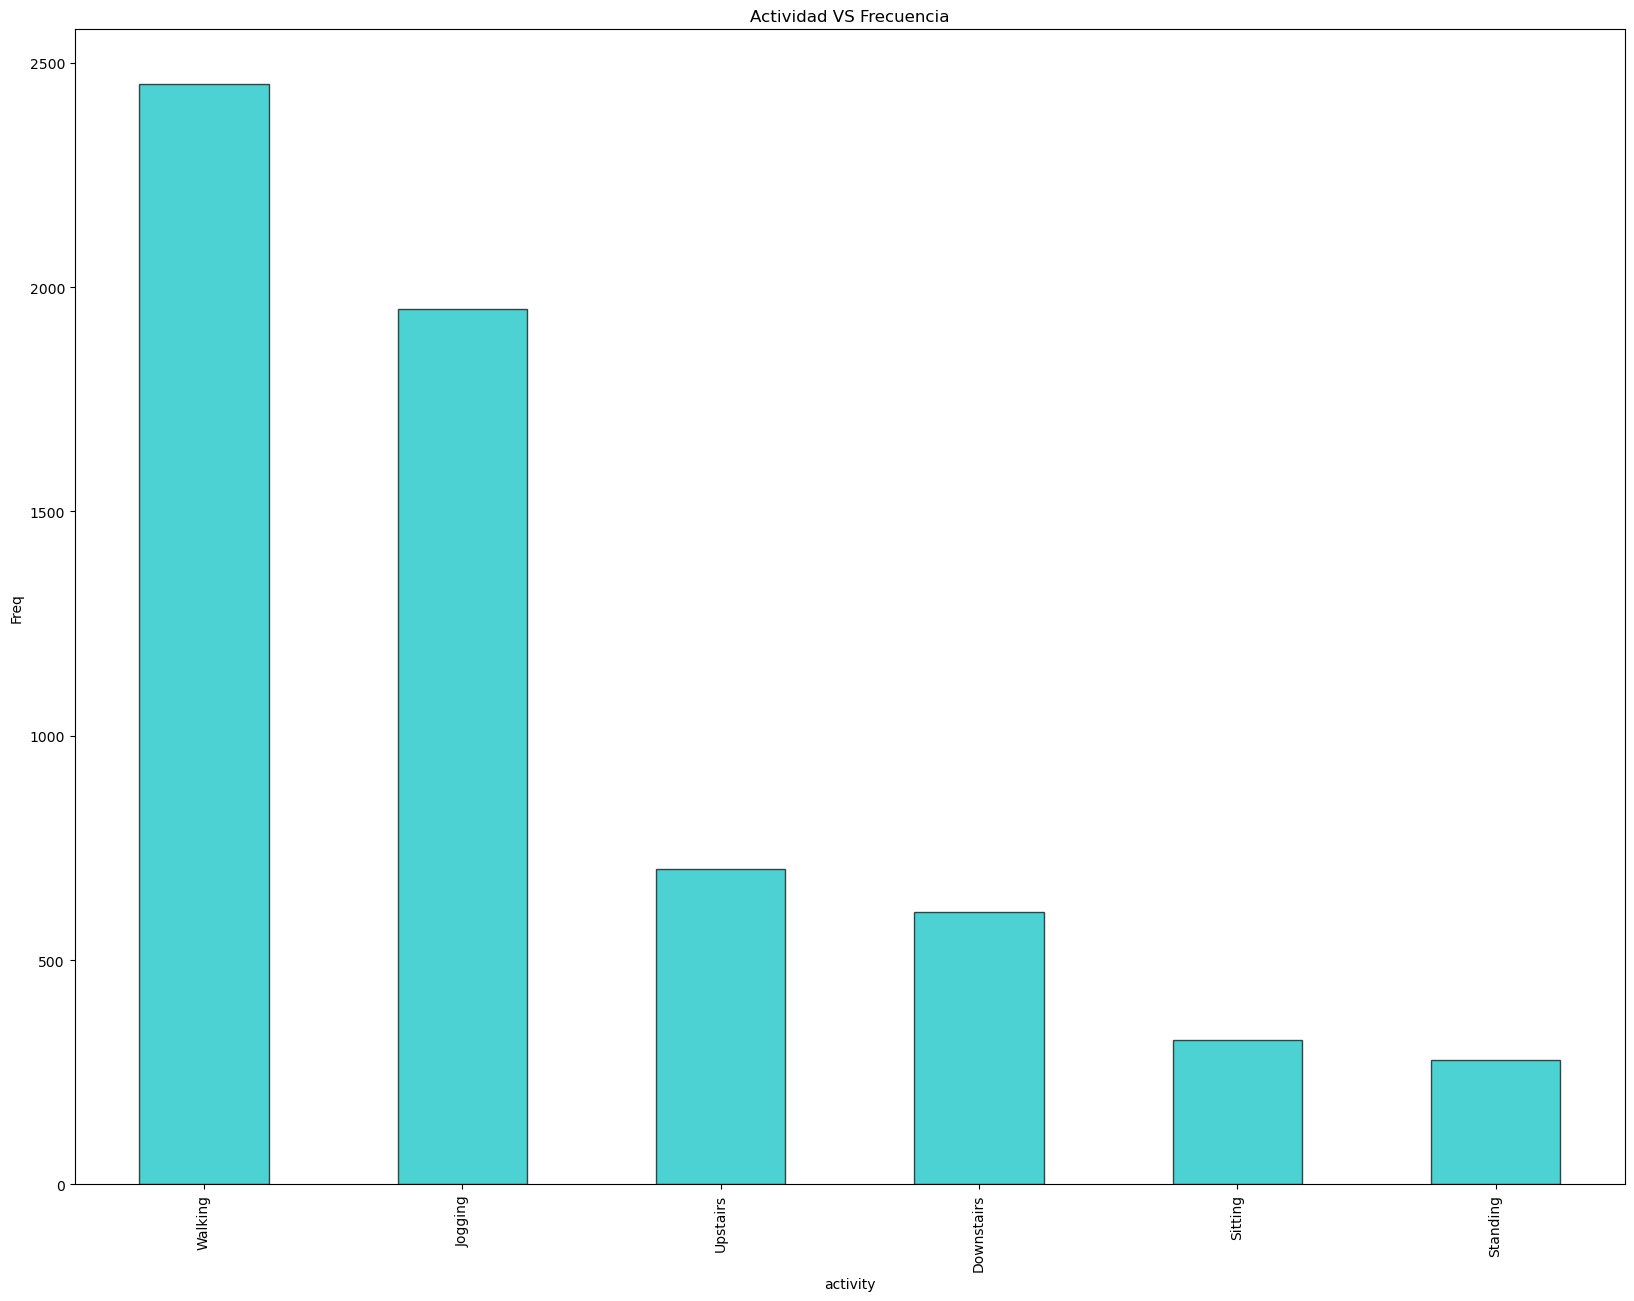

In [9]:
plt.figure(figsize=(20, 15))
metadata_copy1["activity"].value_counts().plot(kind="bar", color="c", edgecolor="black", alpha=0.7)
plt.title("Actividad VS Frecuencia")
plt.xlabel("activity")
plt.ylabel('Freq')
plt.show()

*La actividad es un atributo de registros categoricos que puede tomar valores entre 6 categorias (Walking, Jogging, Upstairs, Downstairs, Sitting, Standing), donde "Walking" es el valor mas frecuente con 2452 datos de personas.*

## Valores faltantes

In [10]:
missingMetadata_quantity = metadata_copy1.isnull().sum().sum()

missingMetadata_percentage = (missingMetadata_quantity / (dimension[0] * dimension[1])) * 100

#count the number of null values in each column

print("Cantidad faltante:\n", missingMetadata_quantity)
print("Porcentaje faltante:\n", missingMetadata_percentage)

Cantidad faltante:
 0
Porcentaje faltante:
 0.0


*Aparentemente no hay valores faltantes en el Dataset. Sin embargo, gracias al resumen de las estadisticas descriptivas de los atributos 'axis_length' para cada eje (X, Y y Z), podemos observar que algunas señales del acelerometro no estan descritas en 100 puntos definidos. Esto es problematico ya que una serie representada en una longitud  de cantidad menor no tiene informacion suficiente para poder identificar su actividad correspondiente, por ende se pueden considerar como datos perdidos.*

In [11]:
axis_length = ['x-axis__length', 'y-axis__length', 'z-axis__length']

missingX = metadata_copy1[metadata_copy1['x-axis__length'] != 100]
missingY = metadata_copy1[metadata_copy1['y-axis__length'] != 100]
missingZ = metadata_copy1[metadata_copy1['z-axis__length'] != 100]

missing = pd.merge(missingX, missingY, how='left').merge(missingZ, how='left')
missing

,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,...,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
0,525_271,-163.940000,-2.815000,-2.826552,58.0,2.617994,6.853895,3.852699,1.990000,9.280000,...,-1.780000,-2.348103,58.0,2.608784,6.805753,3.509892,1.690000,9.380000,-9.380000,Jogging
1,537_168,98.720000,1.690000,1.702069,58.0,0.077276,0.005972,1.703822,1.880000,1.880000,...,3.636633,3.625596,58.0,0.092012,0.008466,3.626763,3.786457,3.786457,3.255263,Standing
2,556_37,292.630000,8.120000,8.128611,36.0,0.230292,0.053034,8.131873,8.690000,8.690000,...,1.495000,1.541111,36.0,0.361684,0.130815,1.582984,2.340000,2.340000,0.950000,Sitting
3,559_245,14.710000,3.410000,2.942000,5.0,1.073264,1.151896,3.131655,3.600000,3.600000,...,-1.035146,-0.155272,5.0,4.578387,20.961628,4.581019,8.076866,8.076866,-6.088296,Upstairs
4,607_96,132.907355,1.416516,2.507686,53.0,4.349427,18.917513,5.020558,15.513576,15.513576,...,0.721878,0.961391,53.0,3.108713,9.664099,3.253978,10.188020,10.188020,-7.967904,Jogging
5,630_100,39.410000,0.690000,0.625556,63.0,1.354088,1.833555,1.491601,4.250000,4.250000,...,2.492524,2.476741,63.0,1.583851,2.508585,2.939869,6.278980,6.278980,-2.260978,Downstairs
6,637_0,62.620000,1.035000,0.666170,94.0,2.457963,6.041583,2.546638,4.860000,7.250000,...,2.533385,2.980248,94.0,2.484237,6.171432,3.879860,9.084772,9.084772,-2.070293,Walking
7,640_136,307.190000,4.345000,4.517500,68.0,3.118363,9.724189,5.489262,12.760000,12.760000,...,0.783170,0.865092,68.0,2.583578,6.674874,2.724566,8.689782,8.689782,-4.018002,Downstairs
8,736_284,-4.220000,-2.070000,-1.406667,3.0,0.966517,0.934156,1.706712,-0.040000,2.110000,...,0.800000,0.773333,3.0,0.188739,0.035622,0.796032,0.990000,0.990000,0.530000,Standing
9,740_57,-447.880000,-6.660000,-6.684776,67.0,0.101222,0.010246,6.685542,-6.470000,7.010000,...,6.660000,6.670000,67.0,0.093951,0.008827,6.670662,6.890000,6.890000,6.360000,Sitting


In [12]:
#metadata_copy1.loc[metadata_copy1['x-axis__length'] != 100, 'x-axis__length'] = nan
#metadata_copy1.loc[metadata_copy1['y-axis__length'] != 100, 'y-axis__length'] = nan
#metadata_copy1.loc[metadata_copy1['z-axis__length'] != 100, 'z-axis__length'] = nan

#missingMetadata_quantity = metadata_copy1.isnull().sum().sum()

#missingMetadata_percentage = (missingMetadata_quantity / (dimension[0] * dimension[1])) * 100

#count the number of null values in each column

#print("Cantidad faltante:\n", missingMetadata_quantity)
#print("Porcentaje faltante:\n", missingMetadata_percentage)


*Hay menos del 1% de datos faltantes en el Dataset.*

### Impacto de los valores faltantes

*El porcentaje de valores perdidos del Dataset esta por debajo del 1% respecto a todos los valores. Este porcentaje no tendra un impacto relevante sobre el analisis de los datos. Esto quiere decir que la imputacion es trivial y no se requieren metodos refinados para ello. Se esperan buenos resultados del analisis.*

In [13]:
cols = metadata_copy1.columns.tolist()

In [14]:
#sns.heatmap(metadata_copy1[cols].isnull(), cbar=False)

### Problema de clasificacion

*El dataset se puede utilizar para  relacionar sus distintas variables. En este caso, se puede usar para clasificar las 31 caracteristicas con el objetivo "activity", con el fin de crear un modelo de decision que prediga la actividad que esta realizando el participante.*

## Preparacion de datos

*Para el preprocesamiento de los datos, consideramos que los valores del dataset no estan preparados para su analisis y por tanto vemos necesario aplicar alguna tecnica para mejorar su calidad.*

- *Borrar el registro*

In [15]:
metadata_copy2 = metadata_copy1.copy()

In [16]:
#count the number of NaN values in each column
#metadata_copy2[cols].isnull().sum()

In [17]:
print("Dataframe antes de borrar los registros \n")
metadata_copy2

Dataframe antes de borrar los registros 



,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,...,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
0,525_0,-247.31,-1.805,-2.4731,100.0,4.379826,19.182875,5.029821,7.31,12.41,...,-1.440000,-2.217800,100.0,3.088071,9.536183,3.801949,2.91000,12.95000,-12.950000,Jogging
1,525_1,566.93,5.595,5.6693,100.0,2.906785,8.449399,6.371057,14.10,14.10,...,-0.251976,1.223516,100.0,4.499906,20.249155,4.663276,14.47843,14.47843,-5.053149,Walking
2,525_2,-568.61,-5.305,-5.6861,100.0,6.393058,40.871192,8.555871,8.62,18.24,...,0.950000,0.563900,100.0,5.376821,28.910208,5.406310,12.79000,15.75000,-15.750000,Jogging
3,525_3,-137.60,-1.990,-1.3760,100.0,3.538268,12.519340,3.796408,8.89,9.70,...,-2.775000,-3.610400,100.0,3.235463,10.468218,4.848011,1.80000,10.88000,-10.880000,Jogging
4,525_4,-583.99,-5.000,-5.8399,100.0,6.513692,42.428177,8.748292,6.51,18.96,...,-3.375000,-4.456700,100.0,5.149686,26.519264,6.810392,7.40000,15.83000,-15.830000,Jogging
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6305,954_249,454.79,4.560,4.5479,100.0,0.064425,0.004151,4.548356,4.67,4.67,...,-5.750000,-5.900900,100.0,0.240413,0.057798,5.905795,-5.56000,6.55000,-6.550000,Sitting
6306,954_250,925.47,10.060,9.2547,100.0,6.609024,43.679199,11.372276,19.34,19.34,...,-6.170000,-5.760500,100.0,4.383213,19.212555,7.238502,4.90000,16.24000,-16.240000,Walking
6307,954_251,-989.74,-9.810,-9.8974,100.0,5.396625,29.123561,11.273069,2.34,19.61,...,-1.535000,-1.844500,100.0,5.093464,25.943371,5.417153,9.08000,17.67000,-17.670000,Upstairs
6308,954_252,848.60,8.200,8.4860,100.0,5.647264,31.891592,10.193321,18.77,18.77,...,-6.590000,-6.865000,100.0,6.141064,37.712671,9.210912,17.47000,19.27000,-19.270000,Upstairs


In [18]:
metadata_copy2.describe(include="all")

,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,...,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
count,6310,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,...,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310
unique,6310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,525_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2452
mean,NaN,76.485875,0.768275,0.764064,99.820285,4.336914,25.731720,5.958079,10.365680,13.045253,...,-0.041709,0.293695,99.820285,3.808140,18.444842,4.450493,10.972452,12.015277,-7.857530,NaN
std,NaN,432.751791,4.248967,4.332578,3.428416,2.631348,27.860759,3.096221,6.595222,5.492332,...,2.277088,2.170469,3.428416,1.985834,17.531640,1.853362,4.656772,4.329347,5.706378,NaN
min,NaN,-1083.170000,-14.920000,-10.831700,3.000000,0.015658,0.000245,0.064452,-7.590000,0.110000,...,-8.065000,-7.954800,3.000000,0.019697,0.000388,0.166922,-7.590000,0.340000,-19.800000,NaN
25%,NaN,-172.590000,-1.535000,-1.727375,100.000000,2.437640,5.942087,3.333483,5.430000,8.010000,...,-1.320000,-0.800603,100.000000,2.680783,7.186598,3.271888,8.199450,9.275456,-11.645397,NaN
50%,NaN,18.435000,0.095171,0.188050,100.000000,4.092620,16.749539,5.383670,10.000000,13.590000,...,-0.286027,0.046173,100.000000,3.601205,12.968675,4.039206,11.413852,12.220000,-7.500000,NaN
75%,NaN,368.482500,3.405000,3.693025,100.000000,5.826127,33.943760,8.102191,16.470000,18.730000,...,1.127500,1.468171,100.000000,4.954620,24.548258,5.577271,14.437569,15.430000,-4.440233,NaN


In [19]:
#sns.heatmap(metadata_copy2[cols].isnull(), cbar=False)

### Borrar el registro

 - *Lo mas apropiado es eliminar aquellas observaciones con datos perdidos, pues su reconstruccion
       por imputacion podria ser problematica e irreal.*

In [20]:
#metadata_copy2.drop(metadata_copy2[metadata_copy1['x-axis__length'] != 100].index, inplace=True)
metadata_copy2

,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,...,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
0,525_0,-247.31,-1.805,-2.4731,100.0,4.379826,19.182875,5.029821,7.31,12.41,...,-1.440000,-2.217800,100.0,3.088071,9.536183,3.801949,2.91000,12.95000,-12.950000,Jogging
1,525_1,566.93,5.595,5.6693,100.0,2.906785,8.449399,6.371057,14.10,14.10,...,-0.251976,1.223516,100.0,4.499906,20.249155,4.663276,14.47843,14.47843,-5.053149,Walking
2,525_2,-568.61,-5.305,-5.6861,100.0,6.393058,40.871192,8.555871,8.62,18.24,...,0.950000,0.563900,100.0,5.376821,28.910208,5.406310,12.79000,15.75000,-15.750000,Jogging
3,525_3,-137.60,-1.990,-1.3760,100.0,3.538268,12.519340,3.796408,8.89,9.70,...,-2.775000,-3.610400,100.0,3.235463,10.468218,4.848011,1.80000,10.88000,-10.880000,Jogging
4,525_4,-583.99,-5.000,-5.8399,100.0,6.513692,42.428177,8.748292,6.51,18.96,...,-3.375000,-4.456700,100.0,5.149686,26.519264,6.810392,7.40000,15.83000,-15.830000,Jogging
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6305,954_249,454.79,4.560,4.5479,100.0,0.064425,0.004151,4.548356,4.67,4.67,...,-5.750000,-5.900900,100.0,0.240413,0.057798,5.905795,-5.56000,6.55000,-6.550000,Sitting
6306,954_250,925.47,10.060,9.2547,100.0,6.609024,43.679199,11.372276,19.34,19.34,...,-6.170000,-5.760500,100.0,4.383213,19.212555,7.238502,4.90000,16.24000,-16.240000,Walking
6307,954_251,-989.74,-9.810,-9.8974,100.0,5.396625,29.123561,11.273069,2.34,19.61,...,-1.535000,-1.844500,100.0,5.093464,25.943371,5.417153,9.08000,17.67000,-17.670000,Upstairs
6308,954_252,848.60,8.200,8.4860,100.0,5.647264,31.891592,10.193321,18.77,18.77,...,-6.590000,-6.865000,100.0,6.141064,37.712671,9.210912,17.47000,19.27000,-19.270000,Upstairs


In [21]:
print("Dataframe despues de borrar los registros \n")
metadata_copy2

Dataframe despues de borrar los registros 



,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,...,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
0,525_0,-247.31,-1.805,-2.4731,100.0,4.379826,19.182875,5.029821,7.31,12.41,...,-1.440000,-2.217800,100.0,3.088071,9.536183,3.801949,2.91000,12.95000,-12.950000,Jogging
1,525_1,566.93,5.595,5.6693,100.0,2.906785,8.449399,6.371057,14.10,14.10,...,-0.251976,1.223516,100.0,4.499906,20.249155,4.663276,14.47843,14.47843,-5.053149,Walking
2,525_2,-568.61,-5.305,-5.6861,100.0,6.393058,40.871192,8.555871,8.62,18.24,...,0.950000,0.563900,100.0,5.376821,28.910208,5.406310,12.79000,15.75000,-15.750000,Jogging
3,525_3,-137.60,-1.990,-1.3760,100.0,3.538268,12.519340,3.796408,8.89,9.70,...,-2.775000,-3.610400,100.0,3.235463,10.468218,4.848011,1.80000,10.88000,-10.880000,Jogging
4,525_4,-583.99,-5.000,-5.8399,100.0,6.513692,42.428177,8.748292,6.51,18.96,...,-3.375000,-4.456700,100.0,5.149686,26.519264,6.810392,7.40000,15.83000,-15.830000,Jogging
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6305,954_249,454.79,4.560,4.5479,100.0,0.064425,0.004151,4.548356,4.67,4.67,...,-5.750000,-5.900900,100.0,0.240413,0.057798,5.905795,-5.56000,6.55000,-6.550000,Sitting
6306,954_250,925.47,10.060,9.2547,100.0,6.609024,43.679199,11.372276,19.34,19.34,...,-6.170000,-5.760500,100.0,4.383213,19.212555,7.238502,4.90000,16.24000,-16.240000,Walking
6307,954_251,-989.74,-9.810,-9.8974,100.0,5.396625,29.123561,11.273069,2.34,19.61,...,-1.535000,-1.844500,100.0,5.093464,25.943371,5.417153,9.08000,17.67000,-17.670000,Upstairs
6308,954_252,848.60,8.200,8.4860,100.0,5.647264,31.891592,10.193321,18.77,18.77,...,-6.590000,-6.865000,100.0,6.141064,37.712671,9.210912,17.47000,19.27000,-19.270000,Upstairs


In [22]:
metadata_copy2.describe(include="all")

,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,...,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
count,6310,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,...,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310
unique,6310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,525_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2452
mean,NaN,76.485875,0.768275,0.764064,99.820285,4.336914,25.731720,5.958079,10.365680,13.045253,...,-0.041709,0.293695,99.820285,3.808140,18.444842,4.450493,10.972452,12.015277,-7.857530,NaN
std,NaN,432.751791,4.248967,4.332578,3.428416,2.631348,27.860759,3.096221,6.595222,5.492332,...,2.277088,2.170469,3.428416,1.985834,17.531640,1.853362,4.656772,4.329347,5.706378,NaN
min,NaN,-1083.170000,-14.920000,-10.831700,3.000000,0.015658,0.000245,0.064452,-7.590000,0.110000,...,-8.065000,-7.954800,3.000000,0.019697,0.000388,0.166922,-7.590000,0.340000,-19.800000,NaN
25%,NaN,-172.590000,-1.535000,-1.727375,100.000000,2.437640,5.942087,3.333483,5.430000,8.010000,...,-1.320000,-0.800603,100.000000,2.680783,7.186598,3.271888,8.199450,9.275456,-11.645397,NaN
50%,NaN,18.435000,0.095171,0.188050,100.000000,4.092620,16.749539,5.383670,10.000000,13.590000,...,-0.286027,0.046173,100.000000,3.601205,12.968675,4.039206,11.413852,12.220000,-7.500000,NaN
75%,NaN,368.482500,3.405000,3.693025,100.000000,5.826127,33.943760,8.102191,16.470000,18.730000,...,1.127500,1.468171,100.000000,4.954620,24.548258,5.577271,14.437569,15.430000,-4.440233,NaN


In [23]:
#sns.heatmap(metadata_copy2[cols].isnull(), cbar=False)

In [24]:
metadata_copy2[cols].isnull().sum()

user_snippet                  0
x-axis__sum_values            0
x-axis__median                0
x-axis__mean                  0
x-axis__length                0
x-axis__standard_deviation    0
x-axis__variance              0
x-axis__root_mean_square      0
x-axis__maximum               0
x-axis__absolute_maximum      0
x-axis__minimum               0
y-axis__sum_values            0
y-axis__median                0
y-axis__mean                  0
y-axis__length                0
y-axis__standard_deviation    0
y-axis__variance              0
y-axis__root_mean_square      0
y-axis__maximum               0
y-axis__absolute_maximum      0
y-axis__minimum               0
z-axis__sum_values            0
z-axis__median                0
z-axis__mean                  0
z-axis__length                0
z-axis__standard_deviation    0
z-axis__variance              0
z-axis__root_mean_square      0
z-axis__maximum               0
z-axis__absolute_maximum      0
z-axis__minimum               0
activity

# Modelado

*Saber el tipo de analisis que hay que realizar y modelarlo, por medio de tareas de modelado de Data Mining y Machine Learning.*

In [25]:
metadata_copy2.groupby("activity").size()

activity
Downstairs     606
Jogging       1951
Sitting        321
Standing       278
Upstairs       702
Walking       2452
dtype: int64

F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

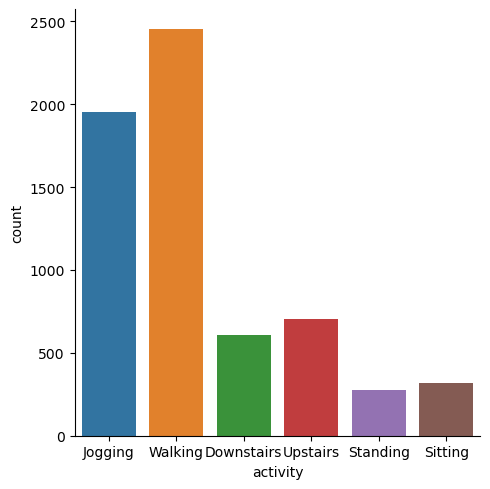

In [26]:
sns.catplot(x="activity", data=metadata_copy2, kind="count")

In [67]:
metadata_copy2.loc[metadata_copy2['activity'] == 'Jogging', 'activity'] = 0
metadata_copy2.loc[metadata_copy2['activity'] == 'Walking', 'activity'] = 1
metadata_copy2.loc[metadata_copy2['activity'] == 'Downstairs', 'activity'] = 2
metadata_copy2.loc[metadata_copy2['activity'] == 'Upstairs', 'activity'] = 3
metadata_copy2.loc[metadata_copy2['activity'] == 'Standing', 'activity'] = 4
metadata_copy2.loc[metadata_copy2['activity'] == 'Sitting', 'activity'] = 5

y_num = metadata_copy2["activity"]
#metadata_copy2.groupby("activity").size()

F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

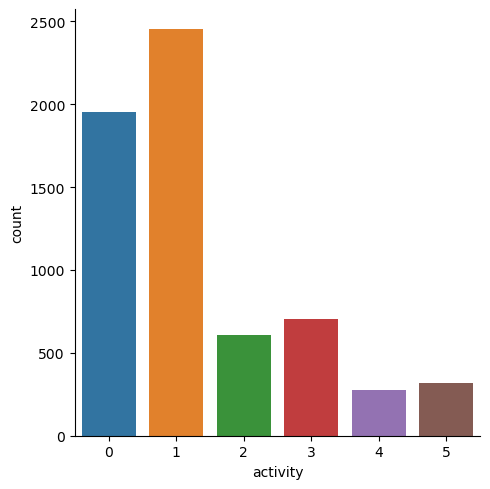

In [28]:
sns.catplot(x="activity", data=metadata_copy2, kind="count")

## ADABoost


*Variante a GBM que lo implementa en paralelo, optimizandolo computacionalmente.*

### Selección de características

*Dividir caracteristicas y atributo de clase (objetivo).*

In [29]:
metadata_copy3 = pd.DataFrame(metadata_copy1, columns=metadata_copy2.columns[1:])
metadata_copy3

,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,x-axis__minimum,...,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
0,-247.31,-1.805,-2.4731,100.0,4.379826,19.182875,5.029821,7.31,12.41,-12.41,...,-1.440000,-2.217800,100.0,3.088071,9.536183,3.801949,2.91000,12.95000,-12.950000,Jogging
1,566.93,5.595,5.6693,100.0,2.906785,8.449399,6.371057,14.10,14.10,-0.95,...,-0.251976,1.223516,100.0,4.499906,20.249155,4.663276,14.47843,14.47843,-5.053149,Walking
2,-568.61,-5.305,-5.6861,100.0,6.393058,40.871192,8.555871,8.62,18.24,-18.24,...,0.950000,0.563900,100.0,5.376821,28.910208,5.406310,12.79000,15.75000,-15.750000,Jogging
3,-137.60,-1.990,-1.3760,100.0,3.538268,12.519340,3.796408,8.89,9.70,-9.70,...,-2.775000,-3.610400,100.0,3.235463,10.468218,4.848011,1.80000,10.88000,-10.880000,Jogging
4,-583.99,-5.000,-5.8399,100.0,6.513692,42.428177,8.748292,6.51,18.96,-18.96,...,-3.375000,-4.456700,100.0,5.149686,26.519264,6.810392,7.40000,15.83000,-15.830000,Jogging
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6305,454.79,4.560,4.5479,100.0,0.064425,0.004151,4.548356,4.67,4.67,4.37,...,-5.750000,-5.900900,100.0,0.240413,0.057798,5.905795,-5.56000,6.55000,-6.550000,Sitting
6306,925.47,10.060,9.2547,100.0,6.609024,43.679199,11.372276,19.34,19.34,-7.46,...,-6.170000,-5.760500,100.0,4.383213,19.212555,7.238502,4.90000,16.24000,-16.240000,Walking
6307,-989.74,-9.810,-9.8974,100.0,5.396625,29.123561,11.273069,2.34,19.61,-19.61,...,-1.535000,-1.844500,100.0,5.093464,25.943371,5.417153,9.08000,17.67000,-17.670000,Upstairs
6308,848.60,8.200,8.4860,100.0,5.647264,31.891592,10.193321,18.77,18.77,-2.11,...,-6.590000,-6.865000,100.0,6.141064,37.712671,9.210912,17.47000,19.27000,-19.270000,Upstairs


In [30]:
features = metadata_copy3.columns[:-1].tolist()
features

['x-axis__sum_values',
 'x-axis__median',
 'x-axis__mean',
 'x-axis__length',
 'x-axis__standard_deviation',
 'x-axis__variance',
 'x-axis__root_mean_square',
 'x-axis__maximum',
 'x-axis__absolute_maximum',
 'x-axis__minimum',
 'y-axis__sum_values',
 'y-axis__median',
 'y-axis__mean',
 'y-axis__length',
 'y-axis__standard_deviation',
 'y-axis__variance',
 'y-axis__root_mean_square',
 'y-axis__maximum',
 'y-axis__absolute_maximum',
 'y-axis__minimum',
 'z-axis__sum_values',
 'z-axis__median',
 'z-axis__mean',
 'z-axis__length',
 'z-axis__standard_deviation',
 'z-axis__variance',
 'z-axis__root_mean_square',
 'z-axis__maximum',
 'z-axis__absolute_maximum',
 'z-axis__minimum']

In [31]:
X = metadata_copy3[features] # Del dataset extrae los atributos exceptuando la clase
y = metadata_copy3["activity"] # Del dataset extrae la clase de cada registro

In [32]:
#X_2 = metadata_copy4[features]
#y_2 = metadata_copy4[['activity_Jogging', "activity_Sitting", "activity_Standing", "activity_Upstairs", "activity_Walking"]]

In [33]:
#X_rr = pd.DataFrame(X)


#X_rr.describe(include="all").to_csv("Tabla_2.csv", index=True)

In [34]:
X

,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,x-axis__minimum,...,z-axis__sum_values,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum
0,-247.31,-1.805,-2.4731,100.0,4.379826,19.182875,5.029821,7.31,12.41,-12.41,...,-221.780000,-1.440000,-2.217800,100.0,3.088071,9.536183,3.801949,2.91000,12.95000,-12.950000
1,566.93,5.595,5.6693,100.0,2.906785,8.449399,6.371057,14.10,14.10,-0.95,...,122.351584,-0.251976,1.223516,100.0,4.499906,20.249155,4.663276,14.47843,14.47843,-5.053149
2,-568.61,-5.305,-5.6861,100.0,6.393058,40.871192,8.555871,8.62,18.24,-18.24,...,56.390000,0.950000,0.563900,100.0,5.376821,28.910208,5.406310,12.79000,15.75000,-15.750000
3,-137.60,-1.990,-1.3760,100.0,3.538268,12.519340,3.796408,8.89,9.70,-9.70,...,-361.040000,-2.775000,-3.610400,100.0,3.235463,10.468218,4.848011,1.80000,10.88000,-10.880000
4,-583.99,-5.000,-5.8399,100.0,6.513692,42.428177,8.748292,6.51,18.96,-18.96,...,-445.670000,-3.375000,-4.456700,100.0,5.149686,26.519264,6.810392,7.40000,15.83000,-15.830000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6305,454.79,4.560,4.5479,100.0,0.064425,0.004151,4.548356,4.67,4.67,4.37,...,-590.090000,-5.750000,-5.900900,100.0,0.240413,0.057798,5.905795,-5.56000,6.55000,-6.550000
6306,925.47,10.060,9.2547,100.0,6.609024,43.679199,11.372276,19.34,19.34,-7.46,...,-576.050000,-6.170000,-5.760500,100.0,4.383213,19.212555,7.238502,4.90000,16.24000,-16.240000
6307,-989.74,-9.810,-9.8974,100.0,5.396625,29.123561,11.273069,2.34,19.61,-19.61,...,-184.450000,-1.535000,-1.844500,100.0,5.093464,25.943371,5.417153,9.08000,17.67000,-17.670000
6308,848.60,8.200,8.4860,100.0,5.647264,31.891592,10.193321,18.77,18.77,-2.11,...,-686.500000,-6.590000,-6.865000,100.0,6.141064,37.712671,9.210912,17.47000,19.27000,-19.270000


In [35]:
y

0        Jogging
1        Walking
2        Jogging
3        Jogging
4        Jogging
          ...   
6305     Sitting
6306     Walking
6307    Upstairs
6308    Upstairs
6309     Sitting
Name: activity, Length: 6310, dtype: object

In [36]:
#metadata_copy4 = pd.get_dummies(metadata_copy3, drop_first=True)
#metadata_copy4

In [37]:
metadata_test = pd.read_csv("dset/metadata_test.csv")

In [38]:
metadata_test

,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,...,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
0,3006_0,190.60,1.365,1.9060,100.0,6.192680,38.349290,6.479362,19.50,19.50,...,-0.950,-0.7361,100.0,3.607485,13.013948,3.681819,10.19,10.19,-9.92,Walking
1,3006_1,-115.08,-2.070,-1.1508,100.0,5.779997,33.408361,5.893446,16.82,16.82,...,-0.420,-0.1361,100.0,3.551672,12.614374,3.554279,9.47,11.75,-11.75,Walking
2,3006_2,-171.08,-1.710,-1.7108,100.0,5.347172,28.592243,5.614186,13.95,13.95,...,-0.480,-0.1396,100.0,2.636698,6.952178,2.640391,8.35,8.50,-8.50,Walking
3,3006_3,633.38,5.790,6.3338,100.0,5.019286,25.193234,8.081476,18.77,18.77,...,-0.995,0.2610,100.0,4.298020,18.472975,4.305937,11.75,11.75,-8.35,Downstairs
4,3006_4,160.75,1.880,1.6075,100.0,5.769199,33.283657,5.988966,19.50,19.50,...,-0.630,-0.4341,100.0,3.324155,11.050006,3.352380,12.03,12.03,-8.27,Walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,3362_321,240.51,1.800,2.4051,100.0,4.942351,24.426829,5.496484,19.46,19.46,...,-2.010,-1.1767,100.0,3.913945,15.318964,4.087002,10.19,10.19,-9.43,Walking
1930,3362_322,820.27,7.990,8.2027,100.0,5.024935,25.249974,9.619473,19.57,19.57,...,-1.495,-0.8761,100.0,3.156403,9.962880,3.275734,11.37,11.37,-7.46,Walking
1931,3362_323,238.86,2.090,2.3886,100.0,5.224328,27.293606,5.744477,19.57,19.57,...,-2.030,-1.4355,100.0,3.741859,14.001509,4.007764,9.85,10.80,-10.80,Walking
1932,3362_324,-661.57,-8.905,-6.6157,100.0,10.357747,107.282925,12.290257,16.78,19.61,...,0.675,0.0319,100.0,7.619450,58.056025,7.619517,18.81,18.81,-16.55,Jogging


In [39]:
axis_length = ['x-axis__length', 'y-axis__length', 'z-axis__length']

missingX_2 = metadata_test[metadata_test['x-axis__length'] != 100]
missingY_2 = metadata_test[metadata_test['y-axis__length'] != 100]
missingZ_2 = metadata_test[metadata_test['z-axis__length'] != 100]

missing_2 = pd.merge(missingX_2, missingY_2, how='left').merge(missingZ_2, how='left')
missing_2

,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,...,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
0,3006_52,143.39,0.190,1.838333,78.0,5.189128,26.927050,5.505136,15.83,15.83,...,-0.21,0.375513,78.0,3.823210,14.616938,3.841607,9.34,9.34,-7.44,Downstairs
1,3171_265,-75.34,-0.950,-1.004533,75.0,0.468889,0.219857,1.108577,1.04,2.75,...,1.18,1.191200,75.0,0.514196,0.264397,1.297442,3.68,3.68,-0.15,Standing
2,3215_112,178.75,3.040,2.628676,68.0,5.875056,34.516285,6.436321,15.09,15.09,...,-0.36,0.242941,68.0,4.696665,22.058662,4.702944,12.57,12.57,-8.01,Jogging
3,3238_320,-562.21,-5.745,-6.110978,92.0,6.347610,40.292154,8.811141,7.97,19.61,...,-1.29,-0.782391,92.0,5.363037,28.762170,5.419807,17.73,17.73,-16.78,Jogging
4,3355_375,599.63,7.210,7.312561,82.0,0.848660,0.720224,7.361642,9.70,9.70,...,0.00,0.250122,82.0,1.081790,1.170269,1.110329,2.87,2.87,-1.38,Standing
5,3362_245,-118.71,-2.415,-1.521923,78.0,4.322305,18.682321,4.582420,10.95,12.07,...,-1.10,-1.062436,78.0,2.757143,7.601839,2.954760,7.08,9.28,-9.28,Downstairs


In [40]:
#metadata_test.loc[metadata_test['x-axis__length'] != 100, 'x-axis__length'] = nan
#metadata_test.loc[metadata_test['y-axis__length'] != 100, 'y-axis__length'] = nan
#metadata_test.loc[metadata_test['z-axis__length'] != 100, 'z-axis__length'] = nan

#missingMetadataT_quantity = metadata_test.isnull().sum().sum()

#missingMetadataT_percentage = (missingMetadataT_quantity / (metadata_test.shape[0] * metadata_test.shape[1])) * 100

#count the number of null values in each column

#print("Cantidad faltante:\n", missingMetadataT_quantity)
#print("Porcentaje faltante:\n", missingMetadataT_percentage)

In [41]:
#sns.heatmap(metadata_test[cols].isnull(), cbar=False)

In [42]:
metadata_test2 = metadata_test.copy()

In [43]:
metadata_test2[cols].isnull().sum()

user_snippet                  0
x-axis__sum_values            0
x-axis__median                0
x-axis__mean                  0
x-axis__length                0
x-axis__standard_deviation    0
x-axis__variance              0
x-axis__root_mean_square      0
x-axis__maximum               0
x-axis__absolute_maximum      0
x-axis__minimum               0
y-axis__sum_values            0
y-axis__median                0
y-axis__mean                  0
y-axis__length                0
y-axis__standard_deviation    0
y-axis__variance              0
y-axis__root_mean_square      0
y-axis__maximum               0
y-axis__absolute_maximum      0
y-axis__minimum               0
z-axis__sum_values            0
z-axis__median                0
z-axis__mean                  0
z-axis__length                0
z-axis__standard_deviation    0
z-axis__variance              0
z-axis__root_mean_square      0
z-axis__maximum               0
z-axis__absolute_maximum      0
z-axis__minimum               0
activity

In [44]:
print("Dataframe antes de borrar los registros \n")
metadata_test2

Dataframe antes de borrar los registros 



,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,...,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
0,3006_0,190.60,1.365,1.9060,100.0,6.192680,38.349290,6.479362,19.50,19.50,...,-0.950,-0.7361,100.0,3.607485,13.013948,3.681819,10.19,10.19,-9.92,Walking
1,3006_1,-115.08,-2.070,-1.1508,100.0,5.779997,33.408361,5.893446,16.82,16.82,...,-0.420,-0.1361,100.0,3.551672,12.614374,3.554279,9.47,11.75,-11.75,Walking
2,3006_2,-171.08,-1.710,-1.7108,100.0,5.347172,28.592243,5.614186,13.95,13.95,...,-0.480,-0.1396,100.0,2.636698,6.952178,2.640391,8.35,8.50,-8.50,Walking
3,3006_3,633.38,5.790,6.3338,100.0,5.019286,25.193234,8.081476,18.77,18.77,...,-0.995,0.2610,100.0,4.298020,18.472975,4.305937,11.75,11.75,-8.35,Downstairs
4,3006_4,160.75,1.880,1.6075,100.0,5.769199,33.283657,5.988966,19.50,19.50,...,-0.630,-0.4341,100.0,3.324155,11.050006,3.352380,12.03,12.03,-8.27,Walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,3362_321,240.51,1.800,2.4051,100.0,4.942351,24.426829,5.496484,19.46,19.46,...,-2.010,-1.1767,100.0,3.913945,15.318964,4.087002,10.19,10.19,-9.43,Walking
1930,3362_322,820.27,7.990,8.2027,100.0,5.024935,25.249974,9.619473,19.57,19.57,...,-1.495,-0.8761,100.0,3.156403,9.962880,3.275734,11.37,11.37,-7.46,Walking
1931,3362_323,238.86,2.090,2.3886,100.0,5.224328,27.293606,5.744477,19.57,19.57,...,-2.030,-1.4355,100.0,3.741859,14.001509,4.007764,9.85,10.80,-10.80,Walking
1932,3362_324,-661.57,-8.905,-6.6157,100.0,10.357747,107.282925,12.290257,16.78,19.61,...,0.675,0.0319,100.0,7.619450,58.056025,7.619517,18.81,18.81,-16.55,Jogging


In [45]:
metadata_test2.describe(include="all")

,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,...,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
count,1934,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,...,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934
unique,1934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,3006_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,768
mean,NaN,29.180129,0.173519,0.292570,99.934333,5.639598,38.649251,7.093262,13.164105,15.742234,...,-0.767332,-0.247763,99.934333,4.450370,22.665260,4.679225,12.967477,13.653837,-10.151246,NaN
std,NaN,462.628496,4.602899,4.627893,1.245096,2.616816,31.178453,3.135584,5.733743,4.765333,...,1.578829,1.406545,1.245096,1.691434,15.390087,1.676395,3.812788,3.697097,5.040630,NaN
min,NaN,-926.520000,-10.055000,-9.265200,68.000000,0.035805,0.001282,0.717555,-1.330000,0.910000,...,-4.840000,-3.444400,68.000000,0.023511,0.000553,0.076818,-0.720000,0.230000,-19.610000,NaN
25%,NaN,-206.692500,-2.370000,-2.066925,100.000000,3.661059,13.403358,4.630828,8.620000,12.760000,...,-1.780000,-1.080575,100.000000,3.275470,10.728706,3.405886,10.460000,11.070000,-14.210000,NaN
50%,NaN,-48.950000,-0.380000,-0.489500,100.000000,5.195938,26.997767,6.574910,14.120000,18.120000,...,-0.940000,-0.359550,100.000000,4.288113,18.387913,4.478191,12.980000,13.990000,-10.150000,NaN
75%,NaN,331.985000,3.235000,3.319850,100.000000,8.003786,64.060601,9.789627,18.660000,19.570000,...,-0.056250,0.238225,100.000000,5.653926,31.966874,5.844438,16.210000,16.630000,-6.820000,NaN


In [46]:
#sns.heatmap(metadata_test2[cols].isnull(), cbar=False)

In [47]:
#metadata_test2.drop(metadata_test2[metadata_test2['x-axis__length'] != 100].index, inplace=True)
#metadata_test2

In [48]:
print("Dataframe despues de borrar los registros \n")
metadata_test2

Dataframe despues de borrar los registros 



,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,...,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
0,3006_0,190.60,1.365,1.9060,100.0,6.192680,38.349290,6.479362,19.50,19.50,...,-0.950,-0.7361,100.0,3.607485,13.013948,3.681819,10.19,10.19,-9.92,Walking
1,3006_1,-115.08,-2.070,-1.1508,100.0,5.779997,33.408361,5.893446,16.82,16.82,...,-0.420,-0.1361,100.0,3.551672,12.614374,3.554279,9.47,11.75,-11.75,Walking
2,3006_2,-171.08,-1.710,-1.7108,100.0,5.347172,28.592243,5.614186,13.95,13.95,...,-0.480,-0.1396,100.0,2.636698,6.952178,2.640391,8.35,8.50,-8.50,Walking
3,3006_3,633.38,5.790,6.3338,100.0,5.019286,25.193234,8.081476,18.77,18.77,...,-0.995,0.2610,100.0,4.298020,18.472975,4.305937,11.75,11.75,-8.35,Downstairs
4,3006_4,160.75,1.880,1.6075,100.0,5.769199,33.283657,5.988966,19.50,19.50,...,-0.630,-0.4341,100.0,3.324155,11.050006,3.352380,12.03,12.03,-8.27,Walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,3362_321,240.51,1.800,2.4051,100.0,4.942351,24.426829,5.496484,19.46,19.46,...,-2.010,-1.1767,100.0,3.913945,15.318964,4.087002,10.19,10.19,-9.43,Walking
1930,3362_322,820.27,7.990,8.2027,100.0,5.024935,25.249974,9.619473,19.57,19.57,...,-1.495,-0.8761,100.0,3.156403,9.962880,3.275734,11.37,11.37,-7.46,Walking
1931,3362_323,238.86,2.090,2.3886,100.0,5.224328,27.293606,5.744477,19.57,19.57,...,-2.030,-1.4355,100.0,3.741859,14.001509,4.007764,9.85,10.80,-10.80,Walking
1932,3362_324,-661.57,-8.905,-6.6157,100.0,10.357747,107.282925,12.290257,16.78,19.61,...,0.675,0.0319,100.0,7.619450,58.056025,7.619517,18.81,18.81,-16.55,Jogging


In [49]:
metadata_test2.describe(include="all")

,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,...,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
count,1934,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,...,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934
unique,1934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,3006_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,768
mean,NaN,29.180129,0.173519,0.292570,99.934333,5.639598,38.649251,7.093262,13.164105,15.742234,...,-0.767332,-0.247763,99.934333,4.450370,22.665260,4.679225,12.967477,13.653837,-10.151246,NaN
std,NaN,462.628496,4.602899,4.627893,1.245096,2.616816,31.178453,3.135584,5.733743,4.765333,...,1.578829,1.406545,1.245096,1.691434,15.390087,1.676395,3.812788,3.697097,5.040630,NaN
min,NaN,-926.520000,-10.055000,-9.265200,68.000000,0.035805,0.001282,0.717555,-1.330000,0.910000,...,-4.840000,-3.444400,68.000000,0.023511,0.000553,0.076818,-0.720000,0.230000,-19.610000,NaN
25%,NaN,-206.692500,-2.370000,-2.066925,100.000000,3.661059,13.403358,4.630828,8.620000,12.760000,...,-1.780000,-1.080575,100.000000,3.275470,10.728706,3.405886,10.460000,11.070000,-14.210000,NaN
50%,NaN,-48.950000,-0.380000,-0.489500,100.000000,5.195938,26.997767,6.574910,14.120000,18.120000,...,-0.940000,-0.359550,100.000000,4.288113,18.387913,4.478191,12.980000,13.990000,-10.150000,NaN
75%,NaN,331.985000,3.235000,3.319850,100.000000,8.003786,64.060601,9.789627,18.660000,19.570000,...,-0.056250,0.238225,100.000000,5.653926,31.966874,5.844438,16.210000,16.630000,-6.820000,NaN


In [50]:
#sns.heatmap(metadata_test2[cols].isnull(), cbar=False)

In [51]:
metadata_test2[cols].isnull().sum()

user_snippet                  0
x-axis__sum_values            0
x-axis__median                0
x-axis__mean                  0
x-axis__length                0
x-axis__standard_deviation    0
x-axis__variance              0
x-axis__root_mean_square      0
x-axis__maximum               0
x-axis__absolute_maximum      0
x-axis__minimum               0
y-axis__sum_values            0
y-axis__median                0
y-axis__mean                  0
y-axis__length                0
y-axis__standard_deviation    0
y-axis__variance              0
y-axis__root_mean_square      0
y-axis__maximum               0
y-axis__absolute_maximum      0
y-axis__minimum               0
z-axis__sum_values            0
z-axis__median                0
z-axis__mean                  0
z-axis__length                0
z-axis__standard_deviation    0
z-axis__variance              0
z-axis__root_mean_square      0
z-axis__maximum               0
z-axis__absolute_maximum      0
z-axis__minimum               0
activity

In [52]:
metadata_test2.groupby("activity").size()

activity
Downstairs    174
Jogging       689
Sitting        22
Standing       43
Upstairs      238
Walking       768
dtype: int64

F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

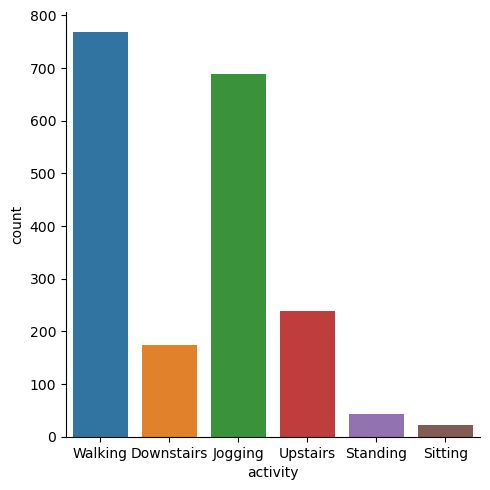

In [53]:
sns.catplot(x="activity", data=metadata_test2, kind="count")

In [54]:
metadata_test3 = pd.DataFrame(metadata_test2, columns=metadata_test2.columns[1:])
metadata_test3

,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,x-axis__minimum,...,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
0,190.60,1.365,1.9060,100.0,6.192680,38.349290,6.479362,19.50,19.50,-10.46,...,-0.950,-0.7361,100.0,3.607485,13.013948,3.681819,10.19,10.19,-9.92,Walking
1,-115.08,-2.070,-1.1508,100.0,5.779997,33.408361,5.893446,16.82,16.82,-12.49,...,-0.420,-0.1361,100.0,3.551672,12.614374,3.554279,9.47,11.75,-11.75,Walking
2,-171.08,-1.710,-1.7108,100.0,5.347172,28.592243,5.614186,13.95,13.95,-11.69,...,-0.480,-0.1396,100.0,2.636698,6.952178,2.640391,8.35,8.50,-8.50,Walking
3,633.38,5.790,6.3338,100.0,5.019286,25.193234,8.081476,18.77,18.77,-5.90,...,-0.995,0.2610,100.0,4.298020,18.472975,4.305937,11.75,11.75,-8.35,Downstairs
4,160.75,1.880,1.6075,100.0,5.769199,33.283657,5.988966,19.50,19.50,-7.78,...,-0.630,-0.4341,100.0,3.324155,11.050006,3.352380,12.03,12.03,-8.27,Walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,240.51,1.800,2.4051,100.0,4.942351,24.426829,5.496484,19.46,19.46,-6.17,...,-2.010,-1.1767,100.0,3.913945,15.318964,4.087002,10.19,10.19,-9.43,Walking
1930,820.27,7.990,8.2027,100.0,5.024935,25.249974,9.619473,19.57,19.57,-2.91,...,-1.495,-0.8761,100.0,3.156403,9.962880,3.275734,11.37,11.37,-7.46,Walking
1931,238.86,2.090,2.3886,100.0,5.224328,27.293606,5.744477,19.57,19.57,-7.08,...,-2.030,-1.4355,100.0,3.741859,14.001509,4.007764,9.85,10.80,-10.80,Walking
1932,-661.57,-8.905,-6.6157,100.0,10.357747,107.282925,12.290257,16.78,19.61,-19.61,...,0.675,0.0319,100.0,7.619450,58.056025,7.619517,18.81,18.81,-16.55,Jogging


In [55]:
X_test = metadata_test3[features] # Del dataset extrae los atributos exceptuando la clase
y_test = metadata_test3["activity"] # Del dataset extrae la clase de cada registro

In [56]:
X

,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,x-axis__minimum,...,z-axis__sum_values,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum
0,-247.31,-1.805,-2.4731,100.0,4.379826,19.182875,5.029821,7.31,12.41,-12.41,...,-221.780000,-1.440000,-2.217800,100.0,3.088071,9.536183,3.801949,2.91000,12.95000,-12.950000
1,566.93,5.595,5.6693,100.0,2.906785,8.449399,6.371057,14.10,14.10,-0.95,...,122.351584,-0.251976,1.223516,100.0,4.499906,20.249155,4.663276,14.47843,14.47843,-5.053149
2,-568.61,-5.305,-5.6861,100.0,6.393058,40.871192,8.555871,8.62,18.24,-18.24,...,56.390000,0.950000,0.563900,100.0,5.376821,28.910208,5.406310,12.79000,15.75000,-15.750000
3,-137.60,-1.990,-1.3760,100.0,3.538268,12.519340,3.796408,8.89,9.70,-9.70,...,-361.040000,-2.775000,-3.610400,100.0,3.235463,10.468218,4.848011,1.80000,10.88000,-10.880000
4,-583.99,-5.000,-5.8399,100.0,6.513692,42.428177,8.748292,6.51,18.96,-18.96,...,-445.670000,-3.375000,-4.456700,100.0,5.149686,26.519264,6.810392,7.40000,15.83000,-15.830000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6305,454.79,4.560,4.5479,100.0,0.064425,0.004151,4.548356,4.67,4.67,4.37,...,-590.090000,-5.750000,-5.900900,100.0,0.240413,0.057798,5.905795,-5.56000,6.55000,-6.550000
6306,925.47,10.060,9.2547,100.0,6.609024,43.679199,11.372276,19.34,19.34,-7.46,...,-576.050000,-6.170000,-5.760500,100.0,4.383213,19.212555,7.238502,4.90000,16.24000,-16.240000
6307,-989.74,-9.810,-9.8974,100.0,5.396625,29.123561,11.273069,2.34,19.61,-19.61,...,-184.450000,-1.535000,-1.844500,100.0,5.093464,25.943371,5.417153,9.08000,17.67000,-17.670000
6308,848.60,8.200,8.4860,100.0,5.647264,31.891592,10.193321,18.77,18.77,-2.11,...,-686.500000,-6.590000,-6.865000,100.0,6.141064,37.712671,9.210912,17.47000,19.27000,-19.270000


In [57]:
y

0        Jogging
1        Walking
2        Jogging
3        Jogging
4        Jogging
          ...   
6305     Sitting
6306     Walking
6307    Upstairs
6308    Upstairs
6309     Sitting
Name: activity, Length: 6310, dtype: object

In [58]:
X_test

,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,x-axis__minimum,...,z-axis__sum_values,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum
0,190.60,1.365,1.9060,100.0,6.192680,38.349290,6.479362,19.50,19.50,-10.46,...,-73.61,-0.950,-0.7361,100.0,3.607485,13.013948,3.681819,10.19,10.19,-9.92
1,-115.08,-2.070,-1.1508,100.0,5.779997,33.408361,5.893446,16.82,16.82,-12.49,...,-13.61,-0.420,-0.1361,100.0,3.551672,12.614374,3.554279,9.47,11.75,-11.75
2,-171.08,-1.710,-1.7108,100.0,5.347172,28.592243,5.614186,13.95,13.95,-11.69,...,-13.96,-0.480,-0.1396,100.0,2.636698,6.952178,2.640391,8.35,8.50,-8.50
3,633.38,5.790,6.3338,100.0,5.019286,25.193234,8.081476,18.77,18.77,-5.90,...,26.10,-0.995,0.2610,100.0,4.298020,18.472975,4.305937,11.75,11.75,-8.35
4,160.75,1.880,1.6075,100.0,5.769199,33.283657,5.988966,19.50,19.50,-7.78,...,-43.41,-0.630,-0.4341,100.0,3.324155,11.050006,3.352380,12.03,12.03,-8.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,240.51,1.800,2.4051,100.0,4.942351,24.426829,5.496484,19.46,19.46,-6.17,...,-117.67,-2.010,-1.1767,100.0,3.913945,15.318964,4.087002,10.19,10.19,-9.43
1930,820.27,7.990,8.2027,100.0,5.024935,25.249974,9.619473,19.57,19.57,-2.91,...,-87.61,-1.495,-0.8761,100.0,3.156403,9.962880,3.275734,11.37,11.37,-7.46
1931,238.86,2.090,2.3886,100.0,5.224328,27.293606,5.744477,19.57,19.57,-7.08,...,-143.55,-2.030,-1.4355,100.0,3.741859,14.001509,4.007764,9.85,10.80,-10.80
1932,-661.57,-8.905,-6.6157,100.0,10.357747,107.282925,12.290257,16.78,19.61,-19.61,...,3.19,0.675,0.0319,100.0,7.619450,58.056025,7.619517,18.81,18.81,-16.55


In [59]:
y_test

0          Walking
1          Walking
2          Walking
3       Downstairs
4          Walking
           ...    
1929       Walking
1930       Walking
1931       Walking
1932       Jogging
1933       Jogging
Name: activity, Length: 1934, dtype: object

In [60]:
subm = pd.read_csv("dset/metadata_kaggle.csv")

In [61]:
missingX_3 = subm[subm['x-axis__length'] != 100]
missingY_3 = subm[subm['y-axis__length'] != 100]
missingZ_3 = subm[subm['z-axis__length'] != 100]
missingZ_3

,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,...,z-axis__sum_values,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum
177,8054_177,67.77,0.99,0.982174,69.0,0.062156,0.003863,0.984139,1.12,1.12,...,25.09,0.380,0.363623,69.0,0.040180,0.001614,0.365836,0.42,0.42,0.23
211,8138_6,199.35,8.54,8.667391,23.0,2.649998,7.022489,9.063452,13.76,13.76,...,40.25,1.040,1.750000,23.0,2.735580,7.483400,3.247445,7.93,7.93,-2.07
730,8203_395,-120.26,-1.31,-1.279362,94.0,0.297074,0.088253,1.313400,-0.27,1.88,...,70.29,0.690,0.747766,94.0,0.472706,0.223451,0.884650,2.07,2.07,-0.80
1079,8209_201,730.20,8.92,8.904878,82.0,0.122158,0.014923,8.905716,9.23,9.23,...,184.64,2.260,2.251707,82.0,0.178850,0.031987,2.258799,2.60,2.60,1.61
1394,8241_62,7.59,2.56,2.530000,3.0,0.363960,0.132467,2.556045,2.96,2.96,...,3.83,1.610,1.276667,3.0,0.610701,0.372956,1.415215,1.80,1.80,0.42
1645,8399_75,-272.25,-4.04,-4.693966,58.0,4.192742,17.579086,6.293838,3.95,15.47,...,133.79,1.935,2.306724,58.0,4.031830,16.255657,4.645065,14.48,14.48,-7.74
2137,8448_215,-23.00,-2.42,-2.875000,8.0,2.664015,7.096975,3.919515,0.84,7.12,...,17.29,2.530,2.161250,8.0,1.466948,2.151936,2.612075,4.90,4.90,-0.38
2321,8488_175,5.57,0.27,0.118511,47.0,2.851936,8.133540,2.854398,10.38,10.38,...,-74.17,-1.570,-1.578085,47.0,3.179735,10.110713,3.549798,5.52,9.92,-9.92


In [62]:
X_subm_1 = pd.DataFrame(subm, columns=subm.columns[1:])
X_subm_1

,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,x-axis__minimum,...,z-axis__sum_values,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum
0,880.46,8.560,8.8046,100.0,5.146708,26.488599,10.198509,19.53,19.53,-1.04,...,-6.605867,-0.762740,-0.066059,100.0,3.058799,9.356253,3.059513,9.615966,9.615966,-9.152874
1,552.88,5.520,5.5288,100.0,0.039173,0.001535,5.528939,5.63,5.63,5.43,...,823.670000,8.240000,8.236700,100.0,0.037445,0.001402,8.236785,8.310000,8.310000,8.120000
2,848.84,8.045,8.4884,100.0,4.789062,22.935113,9.746181,19.57,19.57,-1.50,...,-7.995144,-0.211115,-0.079951,100.0,3.178891,10.105348,3.179896,9.656827,9.656827,-7.014479
3,100.93,0.990,1.0093,100.0,0.044525,0.001983,1.010282,1.12,1.12,0.89,...,29.770000,0.310000,0.297700,100.0,0.032058,0.001028,0.299421,0.340000,0.340000,0.190000
4,845.52,7.970,8.4552,100.0,4.858636,23.606345,9.751756,19.57,19.57,-2.45,...,1.757024,-0.483522,0.017570,100.0,3.475728,12.080686,3.475773,10.310603,10.310603,-9.956474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501,398.71,5.920,3.9871,100.0,7.161106,51.281437,8.196243,15.94,15.94,-8.39,...,-64.570000,-1.205000,-0.645700,100.0,4.079238,16.640183,4.130026,12.760000,12.760000,-9.660000
2502,80.33,1.075,0.8033,100.0,6.181089,38.205864,6.233069,16.82,16.82,-12.18,...,-72.510000,-1.205000,-0.725100,100.0,3.815712,14.559661,3.883997,9.190000,9.190000,-6.930000
2503,460.29,6.835,4.6029,100.0,7.565091,57.230601,8.855354,18.43,18.43,-8.92,...,-68.050000,-1.205000,-0.680500,100.0,4.391967,19.289373,4.444373,11.750000,11.750000,-8.960000
2504,-3.16,-0.060,-0.0316,100.0,6.332244,40.097309,6.332322,12.68,16.13,-16.13,...,-82.420000,-1.670000,-0.824200,100.0,4.395170,19.317516,4.471781,10.650000,10.650000,-10.380000


In [63]:
from sklearn import preprocessing

mm_scaler = preprocessing.StandardScaler() 
X = mm_scaler.fit_transform(X)  
X_test = mm_scaler.transform(X_test)
X_subm_1 = mm_scaler.transform(X_subm_1)
X

array([[-0.74828468, -0.6056715 , -0.74722729, ..., -1.73147636,
         0.21592099, -0.89248795],
       [ 1.13340488,  1.13606614,  1.13226453, ...,  0.75293704,
         0.56898838,  0.4914856 ],
       [-1.49080145, -1.42946633, -1.48887683, ...,  0.39033311,
         0.86272109, -1.38320582],
       ...,
       [-2.46402302, -2.48980795, -2.46096171, ..., -0.40641923,
         1.30624115, -1.71969808],
       [ 1.78433765,  1.74920486,  1.78243704, ...,  1.39540076,
         1.67584121, -2.00010829],
       [ 0.77078955,  0.77948066,  0.77007272, ..., -3.24552056,
        -1.35949924,  0.30276058]])

In [64]:
# Perform PCA on the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [65]:
# Function to plot the PCA visualization with class labels overlaid
def plot_data_projection(X, y):
    fig, ax = plt.subplots()
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", alpha=0.5)

    # Create a legend for the plot
    handles, labels = scatter.legend_elements()
    legend1 = ax.legend(handles, labels, loc="lower left", title="Classes", fontsize=8)

    # Add the legend to the plot
    ax.add_artist(legend1)

    # Show the plot
    plt.show()

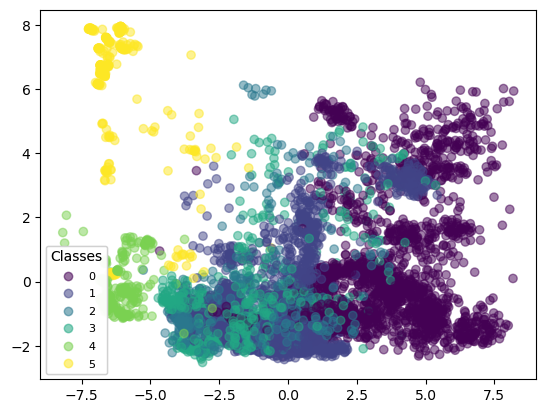

In [68]:
plot_data_projection(X_pca, y_num)

# 'Jogging' = 0
# 'Walking'= 1
# 'Downstairs' = 2
# 'Upstairs' = 3
# 'Standing'= 4
# 'Sitting' = 5

F:\Personal\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


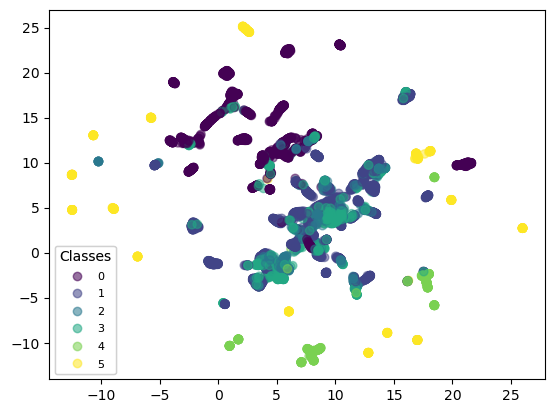

In [70]:
# Perform UMAP dimensionality reduction on the dataset
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

# Plot the UMAP visualization with class labels overlaid
plot_data_projection(X_umap, y_num)

In [71]:

# 'min_samples_split': range(2, 18, 3) | 17, 5, 9, 2 MEJORES
# 'max_depth': [1, 3, 7, 12, 15, 18, 20, None] | 20
# 'max_features': [3, 4, 5, 6, None] | 5 MEJOR
# 'min_samples_leaf': range(3,18,3) | 6 MEJOR
# 'ccp_alpha':[X0.0, 0.001, 0.005,0.010, 0.015, 0.020, 0.025, 0.030, 0.035, 0.05] | 0.0 MEJOR

tree_hyp_grid = {'criterion':["gini"],
                'min_samples_leaf':[6],
                'min_samples_split':[17],
                'max_features':[5],
                'max_depth':[None, 9, 15, 20],
                'min_impurity_decrease':[0.0],
                'random_state':[33]}

mdl_tree = GridSearchCV(DecisionTreeClassifier(), param_grid=tree_hyp_grid, cv=10, scoring='balanced_accuracy', n_jobs=-1).fit(X, y)
mdl_tree.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'min_samples_split': 17,
 'random_state': 33}

In [72]:
mdl_tree.best_score_

# 0.7501309294707783

0.7212302785570931

In [73]:
weak_learner = DecisionTreeClassifier(max_depth=20, min_samples_split=17, min_samples_leaf=6, max_features=5)


# 'learning_rate': [1.0, 0.1, 0.01] | 0.1
# 'n_estimators': range(100, 150, 10) | 140
# 'algorithm': ['SAMME', 'SAMME.R'] | SAMME

ada_hyp_grid = {'estimator':[weak_learner],
                'learning_rate':[0.1],
                'n_estimators':[140],
                'algorithm':['SAMME']}

mdl_ada = GridSearchCV(AdaBoostClassifier(), param_grid=ada_hyp_grid, cv=10, scoring='balanced_accuracy', n_jobs=-1).fit(X, y)
mdl_ada.best_params_

{'algorithm': 'SAMME',
 'estimator': DecisionTreeClassifier(max_depth=20, max_features=5, min_samples_leaf=6,
                        min_samples_split=17),
 'learning_rate': 0.1,
 'n_estimators': 140}

In [74]:
mdl_ada.best_score_


#7935 -> 1.0, 110
# 7970 -> 0.1, 140 

0.7933675680036218

In [75]:
mdl_ada.cv_results_

{'mean_fit_time': array([41.41749916]),
 'std_fit_time': array([4.07846532]),
 'mean_score_time': array([0.23139493]),
 'std_score_time': array([0.03773463]),
 'param_algorithm': masked_array(data=['SAMME'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_estimator': masked_array(data=[DecisionTreeClassifier(max_depth=20, max_features=5, min_samples_leaf=6,
                                           min_samples_split=17)                            ],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.1],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[140],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'algorithm': 'SAMME',
   'estimator': DecisionTreeClassifier(max_depth=20, max_features=5, min_samples_leaf=6,
                          min_samples_split=

In [76]:
#weak_learner_adaa = DecisionTreeClassifier(max_depth=20, min_samples_split=17, min_samples_leaf=6, max_features=None)

#mdl_adaa = AdaBoostClassifier(estimator=weak_learner_adaa, learning_rate=0.1, n_estimators=100, algorithm='SAMME', random_state=33).fit(X, y)

In [77]:
# 'min_samples_leaf':range(3,18,3) | #1 | 6
# min_samples_split #9 | #2 | 17
# max_features | #None | 5
# max_depth | #None #3

#weak_learnerT = DecisionTreeClassifier(max_depth=None, min_samples_split=17, min_samples_leaf=6, max_features=3)

#mdl_adaT = AdaBoostClassifier(estimator=weak_learnerT, learning_rate=0.01, n_estimators=50, algorithm='SAMME.R', random_state=33).fit(X, y)

In [78]:
weak_learner_adaa = DecisionTreeClassifier(max_depth=20, min_samples_split=17, min_samples_leaf=6, max_features=5)

mdl_adaa = AdaBoostClassifier(estimator=weak_learner_adaa, learning_rate=0.1, n_estimators=140, algorithm='SAMME', random_state=33).fit(X, y)

#### Clasificar con el AdaBoost

*Predecir la respuesta para nuevos valores (conjunto de datos de prueba) según el modelo ajustado.*

In [79]:
ypred_ada= mdl_adaa.predict(X_test)

metrics.accuracy_score(y_test, ypred_ada)

0.8159255429162358

In [80]:
y_test

0          Walking
1          Walking
2          Walking
3       Downstairs
4          Walking
           ...    
1929       Walking
1930       Walking
1931       Walking
1932       Jogging
1933       Jogging
Name: activity, Length: 1934, dtype: object

In [81]:
ypred_ada

array(['Walking', 'Walking', 'Walking', ..., 'Walking', 'Jogging',
       'Jogging'], dtype=object)

In [82]:
confusion_matrix(y_test, ypred_ada)

array([[ 45,   2,   0,   0,  37,  90],
       [  0, 677,   0,   0,   1,  11],
       [  0,   0,  22,   0,   0,   0],
       [  0,   0,   7,  35,   1,   0],
       [ 49,  30,   0,   0, 110,  49],
       [ 32,   2,   0,   0,  45, 689]], dtype=int64)

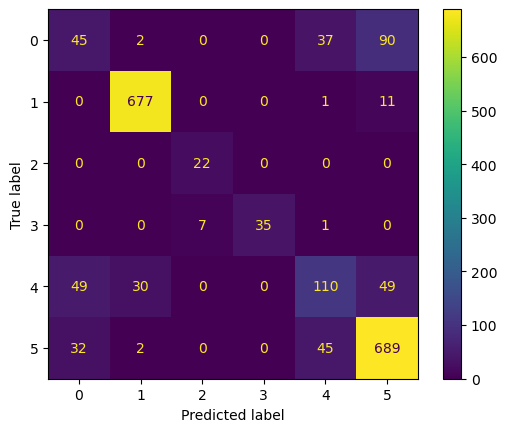

In [83]:
cmd_Ada_1 = ConfusionMatrixDisplay(confusion_matrix(y_test, ypred_ada))
cmd_Ada_1.plot()
plt.show()

### Resultado

In [84]:
ypred_ada_kaggle = mdl_ada.predict(X_subm_1)

***El dataset resultante contiene el atributo 'prediction' (incluyendo el encabezado) para los 2.560 registros del conjunto de datos de prueba tras aplicarle el modelo entrenado previamente.***

In [85]:
result = pd.DataFrame(ypred_ada_kaggle, columns=["prediction"])
result.insert(0, "user_snippet", subm["user_snippet"])

result.to_csv("result.csv", sep=",", index=False)

result

,user_snippet,prediction
0,8054_0,Walking
1,8054_1,Sitting
2,8054_2,Walking
3,8054_3,Standing
4,8054_4,Walking
...,...,...
2501,8488_355,Jogging
2502,8488_356,Walking
2503,8488_357,Jogging
2504,8488_358,Walking


In [87]:
result.groupby("prediction").size()

prediction
Downstairs    306
Jogging       667
Sitting       269
Standing      155
Upstairs      408
Walking       701
dtype: int64

F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

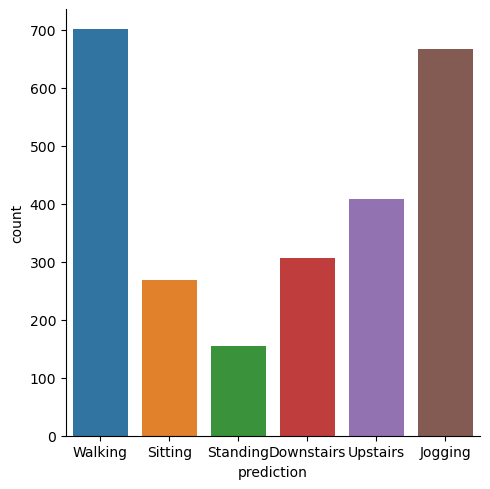

In [89]:
sns.catplot(x="prediction", data=result, kind="count")

# FIN